In [1]:

%load_ext autoreload
%autoreload 2

In [2]:
import pprint
from time import time

import matplotlib.pyplot as plt
import pandas as pd

from backtest import backtest
from downloader import Downloader, load_hlc_cache
from njit_funcs import *
from plotting import plot_fills
from procedures import (
    dump_live_config,
    prepare_backtest_config,
    make_get_filepath,
)
from pure_funcs import (
    numpyize,
    analyze_fills,
)

using numba
using numba


In [3]:
plt.rcParams["figure.figsize"] = [24, 13.5]
plt.rcParams["figure.facecolor"] = "w"
pd.set_option("display.precision", 10)

In [4]:
class Args:
    def __init__(self):
        self.backtest_config_path = "configs/backtest/default.hjson"
        self.exchange = "binance"
        self.symbol = "OGNUSDT"
        self.market_type = "futures"
        self.user = "binance_01"
        self.start_date = "2022-01-01"
        self.end_date = "2022-03-29"
        self.starting_balance = 10000.0
        self.starting_configs = ""
        self.base_dir = "backtests"
        self.ohlcv = False  # set to False to use 1s candles


config = await prepare_backtest_config(Args())
dl = Downloader(config)
sts = time()
if config["ohlcv"]:
    data = load_hlc_cache(
        config["symbol"],
        config["start_date"],
        config["end_date"],
        base_dir=config["base_dir"],
        spot=config["spot"],
        exchange=config["exchange"],
    )
    prices = data[:, 3]
    highs = data[:, 1]
    lows = data[:, 2]
    closes = data[:, 3]
else:
    downloader = Downloader(config)
    data = await downloader.get_sampled_ticks()
    prices = data[:, 2]
    highs = data[:, 2]
    lows = data[:, 2]
    closes = data[:, 2]
timestamps = data[:, 0]
config["n_days"] = (timestamps[-1] - timestamps[0]) / (1000 * 60 * 60 * 24)

print(f"millis to load {len(prices)} ticks {(time() - sts) * 1000:.0f}ms")

fetching market_specific_settings...
linear perpetual
linear perpetual
2022-03-29T14:27:32  fetched ticks OGNUSDT 1 2021-04-01T14:00:02.213000 
2022-03-29T14:27:32  Fetching OGNUSDT 2022-01 


100%|█████████████████████████████████████████████████████████████████████████████| 20.8M/20.8M [00:02<00:00, 7.84MB/s]


2022-03-29T14:27:37  Saving file 33246557_33299999_1640995203686_1641137823694.csv 2022-01-01T07:00:03.686000 
2022-03-29T14:27:37  Saving file 33300000_33399999_1641137824568_1641295385542.csv 2022-01-02T22:37:04.568000 
2022-03-29T14:27:38  Saving file 33400000_33499999_1641295385568_1641402668710.csv 2022-01-04T18:23:05.568000 
2022-03-29T14:27:38  Saving file 33500000_33599999_1641402668832_1641486425772.csv 2022-01-06T00:11:08.832000 
2022-03-29T14:27:38  Saving file 33600000_33699999_1641486426030_1641653793302.csv 2022-01-06T23:27:06.030000 
2022-03-29T14:27:39  Saving file 33700000_33799999_1641653794033_1641840198883.csv 2022-01-08T21:56:34.033000 
2022-03-29T14:27:39  Saving file 33800000_33899999_1641840198894_1642083446692.csv 2022-01-11T01:43:18.894000 
2022-03-29T14:27:39  Saving file 33900000_33999999_1642083463426_1642331294454.csv 2022-01-13T21:17:43.426000 
2022-03-29T14:27:39  Saving file 34000000_34099999_1642331296960_1642575996267.csv 2022-01-16T18:08:16.960000 
2

100%|█████████████████████████████████████████████████████████████████████████████| 18.5M/18.5M [00:02<00:00, 8.50MB/s]


2022-03-29T14:27:46  Saving file 34800000_34899999_1643642632779_1643889302393.csv 2022-01-31T22:23:52.779000 
2022-03-29T14:27:46  Saving file 34900000_34999999_1643889304917_1644105423832.csv 2022-02-03T18:55:04.917000 
2022-03-29T14:27:47  Saving file 35000000_35099999_1644105426296_1644310481699.csv 2022-02-06T06:57:06.296000 
2022-03-29T14:27:47  Saving file 35100000_35199999_1644310482090_1644451706243.csv 2022-02-08T15:54:42.090000 
2022-03-29T14:27:47  Saving file 35200000_35299999_1644451706243_1644527570966.csv 2022-02-10T07:08:26.243000 
2022-03-29T14:27:48  Saving file 35300000_35399999_1644527570966_1644592533204.csv 2022-02-11T04:12:50.966000 
2022-03-29T14:27:48  Saving file 35400000_35499999_1644592533799_1644716170925.csv 2022-02-11T22:15:33.799000 
2022-03-29T14:27:48  Saving file 35500000_35599999_1644716177516_1644784546746.csv 2022-02-13T08:36:17.516000 
2022-03-29T14:27:48  Saving file 35600000_35699999_1644784547581_1644939119662.csv 2022-02-14T03:35:47.581000 
2

100%|███████████████████████████████████████████████████████████████████████████████| 480k/480k [00:00<00:00, 1.16MB/s]


2022-03-29T14:27:51  Saving file 36100000_36199999_1645909679569_1646126252395.csv 2022-02-27T04:07:59.569000 
2022-03-29T14:27:52  Fetching OGNUSDT 2022-03-02 


100%|███████████████████████████████████████████████████████████████████████████████| 477k/477k [00:00<00:00, 1.13MB/s]


2022-03-29T14:27:53  Fetching OGNUSDT 2022-03-03 


100%|███████████████████████████████████████████████████████████████████████████████| 490k/490k [00:00<00:00, 1.10MB/s]


2022-03-29T14:27:54  Fetching OGNUSDT 2022-03-04 


100%|████████████████████████████████████████████████████████████████████████████████| 386k/386k [00:00<00:00, 956kB/s]


2022-03-29T14:27:55  Saving file 36200000_36299999_1646126252395_1646385444847.csv 2022-03-01T16:17:32.395000 
2022-03-29T14:27:55  Fetching OGNUSDT 2022-03-05 


100%|███████████████████████████████████████████████████████████████████████████████| 319k/319k [00:00<00:00, 4.80MB/s]


2022-03-29T14:27:55  Fetching OGNUSDT 2022-03-06 


100%|███████████████████████████████████████████████████████████████████████████████| 446k/446k [00:00<00:00, 1.11MB/s]


2022-03-29T14:27:56  Fetching OGNUSDT 2022-03-07 


100%|███████████████████████████████████████████████████████████████████████████████| 425k/425k [00:00<00:00, 1.01MB/s]


2022-03-29T14:27:58  Saving file 36300000_36399999_1646385449289_1646685048921.csv 2022-03-04T16:17:29.289000 
2022-03-29T14:27:58  Fetching OGNUSDT 2022-03-08 


100%|███████████████████████████████████████████████████████████████████████████████| 413k/413k [00:00<00:00, 1.07MB/s]


2022-03-29T14:27:59  Fetching OGNUSDT 2022-03-09 


100%|███████████████████████████████████████████████████████████████████████████████| 716k/716k [00:00<00:00, 5.64MB/s]


2022-03-29T14:27:59  Fetching OGNUSDT 2022-03-10 


100%|███████████████████████████████████████████████████████████████████████████████| 474k/474k [00:00<00:00, 1.13MB/s]


2022-03-29T14:28:00  Saving file 36400000_36499999_1646685051368_1646888407005.csv 2022-03-08T03:30:51.368000 
2022-03-29T14:28:00  Fetching OGNUSDT 2022-03-11 


100%|███████████████████████████████████████████████████████████████████████████████| 394k/394k [00:00<00:00, 11.6MB/s]


2022-03-29T14:28:01  Fetching OGNUSDT 2022-03-12 


100%|████████████████████████████████████████████████████████████████████████████████| 215k/215k [00:00<00:00, 729kB/s]


2022-03-29T14:28:02  Fetching OGNUSDT 2022-03-13 


100%|█████████████████████████████████████████████████████████████████████████████| 4.86M/4.86M [00:01<00:00, 4.91MB/s]


2022-03-29T14:28:04  Saving file 36500000_36599999_1646888407146_1647177577800.csv 2022-03-10T12:00:07.146000 
2022-03-29T14:28:04  Saving file 36600000_36699999_1647177577800_1647182962591.csv 2022-03-13T20:19:37.800000 
2022-03-29T14:28:04  Saving file 36700000_36799999_1647182962591_1647193474591.csv 2022-03-13T21:49:22.591000 
2022-03-29T14:28:04  Saving file 36800000_36899999_1647193474832_1647211692187.csv 2022-03-14T00:44:34.832000 
2022-03-29T14:28:05  Fetching OGNUSDT 2022-03-14 


100%|█████████████████████████████████████████████████████████████████████████████| 9.48M/9.48M [00:01<00:00, 6.95MB/s]


2022-03-29T14:28:07  Saving file 36900000_36999999_1647211692338_1647229017419.csv 2022-03-14T05:48:12.338000 
2022-03-29T14:28:08  Saving file 37000000_37099999_1647229017431_1647237785444.csv 2022-03-14T10:36:57.431000 
2022-03-29T14:28:08  Saving file 37100000_37199999_1647237785472_1647248014960.csv 2022-03-14T13:03:05.472000 
2022-03-29T14:28:08  Saving file 37200000_37299999_1647248015029_1647256480815.csv 2022-03-14T15:53:35.029000 
2022-03-29T14:28:09  Saving file 37300000_37399999_1647256480965_1647266551541.csv 2022-03-14T18:14:40.965000 
2022-03-29T14:28:09  Saving file 37400000_37499999_1647266551552_1647281048370.csv 2022-03-14T21:02:31.552000 
2022-03-29T14:28:09  Saving file 37500000_37599999_1647281049176_1647295427299.csv 2022-03-15T01:04:09.176000 
2022-03-29T14:28:09  Fetching OGNUSDT 2022-03-15 


100%|█████████████████████████████████████████████████████████████████████████████| 11.3M/11.3M [00:01<00:00, 7.35MB/s]


2022-03-29T14:28:12  Saving file 37600000_37699999_1647295427342_1647304141243.csv 2022-03-15T05:03:47.342000 
2022-03-29T14:28:13  Saving file 37700000_37799999_1647304141243_1647314362479.csv 2022-03-15T07:29:01.243000 
2022-03-29T14:28:13  Saving file 37800000_37899999_1647314362492_1647329982405.csv 2022-03-15T10:19:22.492000 
2022-03-29T14:28:13  Saving file 37900000_37999999_1647329982428_1647334876593.csv 2022-03-15T14:39:42.428000 
2022-03-29T14:28:14  Saving file 38000000_38099999_1647334876599_1647343133042.csv 2022-03-15T16:01:16.599000 
2022-03-29T14:28:14  Saving file 38100000_38199999_1647343133042_1647350571059.csv 2022-03-15T18:18:53.042000 
2022-03-29T14:28:14  Saving file 38200000_38299999_1647350571214_1647358878325.csv 2022-03-15T20:22:51.214000 
2022-03-29T14:28:14  Saving file 38300000_38399999_1647358878345_1647366864435.csv 2022-03-15T22:41:18.345000 
2022-03-29T14:28:15  Saving file 38400000_38499999_1647366864435_1647386012886.csv 2022-03-16T00:54:24.435000 
2

100%|█████████████████████████████████████████████████████████████████████████████| 4.84M/4.84M [00:00<00:00, 5.35MB/s]


2022-03-29T14:28:17  Saving file 38500000_38599999_1647386013220_1647403079972.csv 2022-03-16T06:13:33.220000 
2022-03-29T14:28:17  Saving file 38600000_38699999_1647403080117_1647419984068.csv 2022-03-16T10:58:00.117000 
2022-03-29T14:28:17  Saving file 38700000_38799999_1647419984224_1647445618561.csv 2022-03-16T15:39:44.224000 
2022-03-29T14:28:18  Fetching OGNUSDT 2022-03-17 


100%|█████████████████████████████████████████████████████████████████████████████| 2.07M/2.07M [00:00<00:00, 3.22MB/s]


2022-03-29T14:28:19  Saving file 38800000_38899999_1647445618585_1647481812585.csv 2022-03-16T22:46:58.585000 
2022-03-29T14:28:19  Saving file 38900000_38999999_1647481812788_1647532889569.csv 2022-03-17T08:50:12.788000 
2022-03-29T14:28:20  Fetching OGNUSDT 2022-03-18 


100%|█████████████████████████████████████████████████████████████████████████████| 10.1M/10.1M [00:01<00:00, 6.78MB/s]


2022-03-29T14:28:23  Saving file 39000000_39099999_1647532890853_1647576978386.csv 2022-03-17T23:01:30.853000 
2022-03-29T14:28:23  Saving file 39100000_39199999_1647576978386_1647588365029.csv 2022-03-18T11:16:18.386000 
2022-03-29T14:28:23  Saving file 39200000_39299999_1647588365128_1647593805308.csv 2022-03-18T14:26:05.128000 
2022-03-29T14:28:23  Saving file 39300000_39399999_1647593805337_1647598684138.csv 2022-03-18T15:56:45.337000 
2022-03-29T14:28:24  Saving file 39400000_39499999_1647598684138_1647607215635.csv 2022-03-18T17:18:04.138000 
2022-03-29T14:28:24  Saving file 39500000_39599999_1647607215639_1647616048455.csv 2022-03-18T19:40:15.639000 
2022-03-29T14:28:24  Saving file 39600000_39699999_1647616048633_1647633058872.csv 2022-03-18T22:07:28.633000 
2022-03-29T14:28:25  Saving file 39700000_39799999_1647633059031_1647646713168.csv 2022-03-19T02:50:59.031000 
2022-03-29T14:28:25  Fetching OGNUSDT 2022-03-19 


100%|█████████████████████████████████████████████████████████████████████████████| 15.5M/15.5M [00:02<00:00, 7.80MB/s]


2022-03-29T14:28:29  Saving file 39800000_39899999_1647646713168_1647654986520.csv 2022-03-19T06:38:33.168000 
2022-03-29T14:28:29  Saving file 39900000_39999999_1647654986523_1647658203485.csv 2022-03-19T08:56:26.523000 
2022-03-29T14:28:29  Saving file 40000000_40099999_1647658203496_1647662598619.csv 2022-03-19T09:50:03.496000 
2022-03-29T14:28:30  Saving file 40100000_40199999_1647662598624_1647665364325.csv 2022-03-19T11:03:18.624000 
2022-03-29T14:28:30  Saving file 40200000_40299999_1647665364345_1647668859437.csv 2022-03-19T11:49:24.345000 
2022-03-29T14:28:30  Saving file 40300000_40399999_1647668859570_1647673842123.csv 2022-03-19T12:47:39.570000 
2022-03-29T14:28:31  Saving file 40400000_40499999_1647673842123_1647679115520.csv 2022-03-19T14:10:42.123000 
2022-03-29T14:28:31  Saving file 40500000_40599999_1647679115662_1647687482553.csv 2022-03-19T15:38:35.662000 
2022-03-29T14:28:31  Saving file 40600000_40699999_1647687482608_1647698538397.csv 2022-03-19T17:58:02.608000 
2

100%|█████████████████████████████████████████████████████████████████████████████| 9.70M/9.70M [00:01<00:00, 7.17MB/s]


2022-03-29T14:28:35  Saving file 41000000_41099999_1647726207579_1647740007846.csv 2022-03-20T04:43:27.579000 
2022-03-29T14:28:35  Saving file 41100000_41199999_1647740008603_1647763817658.csv 2022-03-20T08:33:28.603000 
2022-03-29T14:28:36  Saving file 41200000_41299999_1647763817976_1647777879316.csv 2022-03-20T15:10:17.976000 
2022-03-29T14:28:36  Saving file 41300000_41399999_1647777879335_1647784933186.csv 2022-03-20T19:04:39.335000 
2022-03-29T14:28:36  Saving file 41400000_41499999_1647784933246_1647798137548.csv 2022-03-20T21:02:13.246000 
2022-03-29T14:28:37  Saving file 41500000_41599999_1647798137550_1647803907118.csv 2022-03-21T00:42:17.550000 
2022-03-29T14:28:37  Saving file 41600000_41699999_1647803907184_1647811173732.csv 2022-03-21T02:18:27.184000 
2022-03-29T14:28:37  Saving file 41700000_41799999_1647811173732_1647819285074.csv 2022-03-21T04:19:33.732000 
2022-03-29T14:28:37  Fetching OGNUSDT 2022-03-21 


100%|█████████████████████████████████████████████████████████████████████████████| 4.81M/4.81M [00:00<00:00, 5.15MB/s]


2022-03-29T14:28:39  Saving file 41800000_41899999_1647819285149_1647831261292.csv 2022-03-21T06:34:45.149000 
2022-03-29T14:28:40  Saving file 41900000_41999999_1647831261292_1647853669553.csv 2022-03-21T09:54:21.292000 
2022-03-29T14:28:40  Saving file 42000000_42099999_1647853670178_1647881240053.csv 2022-03-21T16:07:50.178000 
2022-03-29T14:28:40  Fetching OGNUSDT 2022-03-22 


100%|█████████████████████████████████████████████████████████████████████████████| 4.40M/4.40M [00:00<00:00, 5.19MB/s]


2022-03-29T14:28:42  Saving file 42100000_42199999_1647881240053_1647908908607.csv 2022-03-21T23:47:20.053000 
2022-03-29T14:28:42  Saving file 42200000_42299999_1647908908607_1647937394809.csv 2022-03-22T07:28:28.607000 
2022-03-29T14:28:43  Saving file 42300000_42399999_1647937394809_1647964528026.csv 2022-03-22T15:23:14.809000 
2022-03-29T14:28:43  Saving file 42400000_42499999_1647964528026_1647985177077.csv 2022-03-22T22:55:28.026000 
2022-03-29T14:28:43  Fetching OGNUSDT 2022-03-23 


100%|█████████████████████████████████████████████████████████████████████████████| 3.02M/3.02M [00:00<00:00, 4.10MB/s]


2022-03-29T14:28:45  Saving file 42500000_42599999_1647985177077_1648012572264.csv 2022-03-23T04:39:37.077000 
2022-03-29T14:28:45  Saving file 42600000_42699999_1648012572264_1648050660437.csv 2022-03-23T12:16:12.264000 
2022-03-29T14:28:45  Fetching OGNUSDT 2022-03-24 


100%|█████████████████████████████████████████████████████████████████████████████| 2.48M/2.48M [00:00<00:00, 3.54MB/s]


2022-03-29T14:28:47  Saving file 42700000_42799999_1648050660586_1648094124621.csv 2022-03-23T22:51:00.586000 
2022-03-29T14:28:47  Saving file 42800000_42899999_1648094124812_1648141606829.csv 2022-03-24T10:55:24.812000 
2022-03-29T14:28:47  Fetching OGNUSDT 2022-03-25 


100%|█████████████████████████████████████████████████████████████████████████████| 2.52M/2.52M [00:00<00:00, 3.70MB/s]


2022-03-29T14:28:49  Saving file 42900000_42999999_1648141606829_1648193527245.csv 2022-03-25T00:06:46.829000 
2022-03-29T14:28:49  Saving file 43000000_43099999_1648193527865_1648230231186.csv 2022-03-25T14:32:07.865000 
2022-03-29T14:28:49  Fetching OGNUSDT 2022-03-26 


100%|█████████████████████████████████████████████████████████████████████████████| 2.73M/2.73M [00:00<00:00, 3.91MB/s]


2022-03-29T14:28:51  Saving file 43100000_43199999_1648230232162_1648273426133.csv 2022-03-26T00:43:52.162000 
2022-03-29T14:28:51  Saving file 43200000_43299999_1648273426133_1648310752395.csv 2022-03-26T12:43:46.133000 
2022-03-29T14:28:51  Fetching OGNUSDT 2022-03-27 


100%|█████████████████████████████████████████████████████████████████████████████| 1.47M/1.47M [00:00<00:00, 2.42MB/s]


2022-03-29T14:28:53  Saving file 43300000_43399999_1648310752589_1648385944640.csv 2022-03-26T23:05:52.589000 
2022-03-29T14:28:53  Fetching OGNUSDT 2022-03-28 
Failed to fetch 2022-03-28 HTTP Error 404: Not Found
2022-03-29T14:28:53  failed to fetch daily 2022-03-28 
2022-03-29T14:28:53  Fetching OGNUSDT 2022-03-29 
Failed to fetch 2022-03-29 HTTP Error 404: Not Found
2022-03-29T14:28:54  failed to fetch daily 2022-03-29 
2022-03-29T14:28:54  Downloading from 2022-03-28T06:59:58.946000 to 2022-03-29T07:00:00 
2022-03-29T14:28:54  fetched ticks OGNUSDT 43455579 2022-03-28T07:00:04.070000 
2022-03-29T14:28:55  fetched ticks OGNUSDT 43456579 2022-03-28T07:07:17.552000 
2022-03-29T14:28:56  fetched ticks OGNUSDT 43457579 2022-03-28T07:17:23.519000 
2022-03-29T14:28:56  fetched ticks OGNUSDT 43458579 2022-03-28T07:29:39.760000 
2022-03-29T14:28:57  fetched ticks OGNUSDT 43459579 2022-03-28T07:35:28.676000 
2022-03-29T14:28:58  fetched ticks OGNUSDT 43460579 2022-03-28T07:44:54.688000 
2022

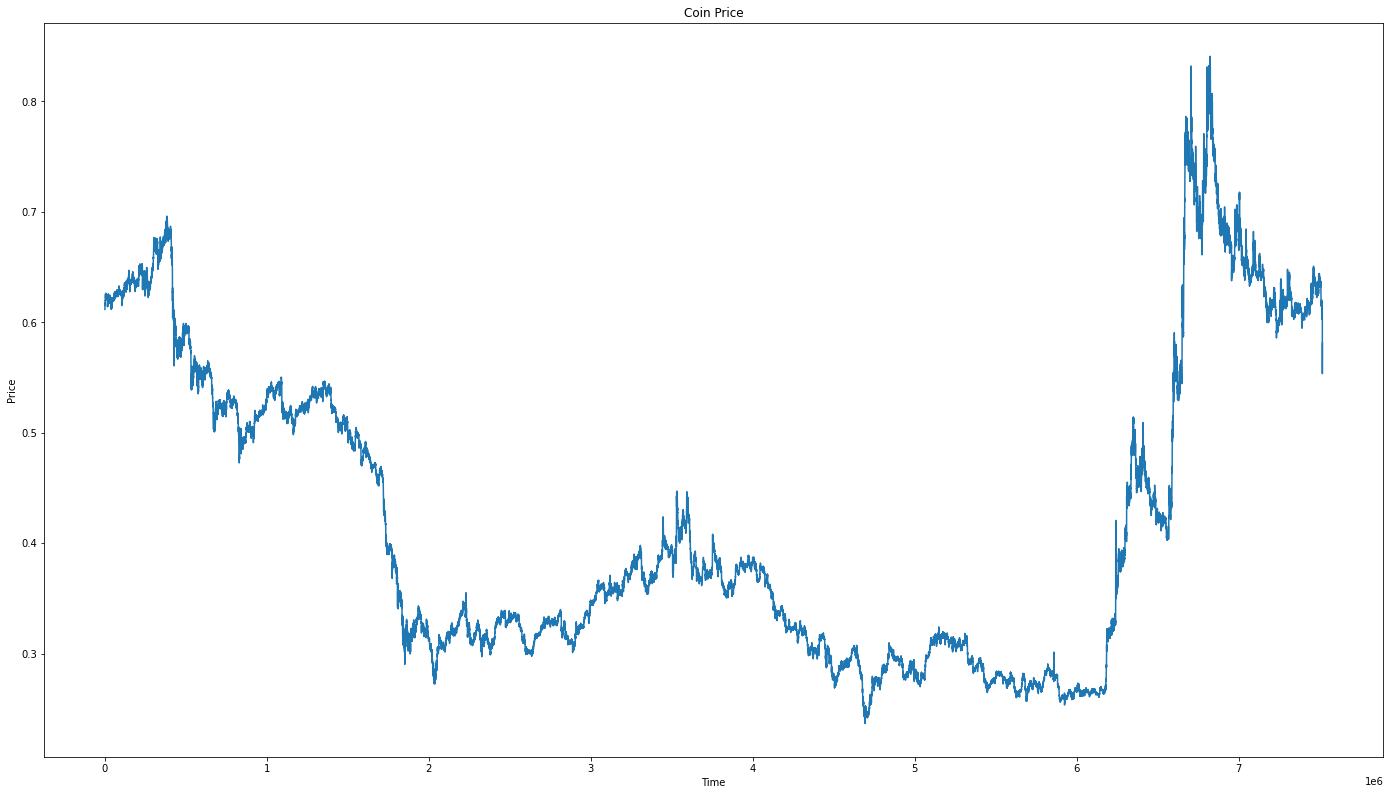

In [62]:
from matplotlib import ticker
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

df = pd.DataFrame({"timestamp": timestamps, "price": prices})  #.set_index("timestamp")
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp')
#df
ax = df.price.iloc[::100].plot(title="Coin Price", xlabel="Time", ylabel="Price")

# df100 = df.iloc[::10]
#
# fig = plt.figure()
# ax = fig.gca()
# ax.plot_date(df100['timestamp'],df100['price'])
# ax.xaxis.set_major_locator(mdates.HourLocator())
# fig.autofmt_xdate()
#
# # ticklabels = df.index.strftime('%Y-%m-%d')
# # ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
# # ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# # plt.show()

In [6]:
# choose a slice on which to test
wsize_days = 365
ts = int(data[-1][0] - 60 * 60 * 24 * 1000 * wsize_days)
idx = np.argmax(data[:, 0] >= ts)
dataslice = data[idx:]

In [7]:
hand_tuned = {"config_name": "static_grid_OGNUSDT_213days",
 "logging_level": 0,
 "long": {"auto_unstuck_ema_dist": 0.04367443724330504,
          "auto_unstuck_wallet_exposure_threshold": 0.2853957544148166,
          "ema_span_0": 1460.6024205026154,
          "ema_span_1": 1623.0127353595476,
          "enabled": True,
          "eprice_exp_base": 1.3288617061033237,
          "eprice_pprice_diff": 0.010163502704010355,
          "grid_span": 0.5287406366608142,
          "initial_eprice_ema_dist": -0.023564585194567163,
          "initial_qty_pct": 0.0831926674835958,
          "markup_range": 0.044294692078343426,
          "max_n_entry_orders": 10,
          "min_markup": 0.04556063748033287,
          "n_close_orders": 4,
          "secondary_allocation": 0.4235606200495476,
          "secondary_pprice_diff": 0.24550605329742042,
          "wallet_exposure_limit": 0.1},
 "short": {"auto_unstuck_ema_dist": 0.07861353109393243,
           "auto_unstuck_wallet_exposure_threshold": 0.5202516217912142,
           "ema_span_0": 674.8712942654004,
           "ema_span_1": 1440,
           "enabled": True,
           "eprice_exp_base": 1.4669694396093598,
           "eprice_pprice_diff": 0.024205280476178915,
           "grid_span": 0.21069044778571133,
           "initial_eprice_ema_dist": -0.07347382704297428,
           "initial_qty_pct": 0.07613022711134655,
           "markup_range": 0.04529754849479907,
           "max_n_entry_orders": 10,
           "min_markup": 0.05,
           "n_close_orders": 9,
           "secondary_allocation": 0.13736417737546291,
           "secondary_pprice_diff": 0.2740154427510883,
           "wallet_exposure_limit": 0.1465241276750935}}

# hand_tuned = load_live_config('configs/live/allround.json')
# hand_tuned['short']['enabled'] = True
config["starting_balance"] = Args().starting_balance
config["latency_simulation_ms"] = 1000
config_to_test = {**config, **numpyize(hand_tuned)}
dump_live_config(config_to_test, make_get_filepath(f"tmp/hand_tuned.json"))
hand_tuned

{'config_name': 'static_grid_OGNUSDT_213days',
 'logging_level': 0,
 'long': {'auto_unstuck_ema_dist': 0.04367443724330504,
  'auto_unstuck_wallet_exposure_threshold': 0.2853957544148166,
  'ema_span_0': 1460.6024205026154,
  'ema_span_1': 1623.0127353595476,
  'enabled': True,
  'eprice_exp_base': 1.3288617061033237,
  'eprice_pprice_diff': 0.010163502704010355,
  'grid_span': 0.5287406366608142,
  'initial_eprice_ema_dist': -0.023564585194567163,
  'initial_qty_pct': 0.0831926674835958,
  'markup_range': 0.044294692078343426,
  'max_n_entry_orders': 10,
  'min_markup': 0.04556063748033287,
  'n_close_orders': 4,
  'secondary_allocation': 0.4235606200495476,
  'secondary_pprice_diff': 0.24550605329742042,
  'wallet_exposure_limit': 0.1},
 'short': {'auto_unstuck_ema_dist': 0.07861353109393243,
  'auto_unstuck_wallet_exposure_threshold': 0.5202516217912142,
  'ema_span_0': 674.8712942654004,
  'ema_span_1': 1440,
  'enabled': True,
  'eprice_exp_base': 1.4669694396093598,
  'eprice_ppr

In [8]:
sts = time()
fills_long, fills_short, stats = backtest(config_to_test, dataslice)
elapsed = time() - sts
print(f"seconds elapsed {elapsed:.4f}")
longs, shorts, sdf, analysis = analyze_fills(fills_long, fills_short, stats, config_to_test)
pprint.pprint(analysis)

seconds elapsed 46.3605
{'DGstd_long': 0.0018991085982336727,
 'DGstd_short': 0.018871896328554617,
 'adg_DGstd_ratio_long': 0.01082637652015344,
 'adg_DGstd_ratio_short': -0.06116502174477045,
 'adg_long': 2.0560464737138546e-05,
 'adg_per_exposure_long': 0.00020560464737138544,
 'adg_per_exposure_short': -0.007877883101004853,
 'adg_realized_long': 5.1653675493090745e-05,
 'adg_realized_per_exposure_long': 0.0005165367549309074,
 'adg_realized_per_exposure_short': -0.003713901192517562,
 'adg_realized_short': -0.0005441761325051253,
 'adg_short': -0.0011542999493010966,
 'avg_fills_per_day_long': 2.5402298850574714,
 'avg_fills_per_day_short': 7.149425287356322,
 'biggest_psize_long': 3030.0,
 'biggest_psize_quote_long': 1004.2333000000001,
 'biggest_psize_quote_short': 1513.9186878104533,
 'biggest_psize_short': 5283.0,
 'closest_bkr_long': 1.0,
 'closest_bkr_short': 1.0,
 'eqbal_ratio_mean_long': 0.9969308686964927,
 'eqbal_ratio_mean_short': 0.9723843720509482,
 'eqbal_ratio_min_l

In [9]:
sdf

,timestamp,bkr_price_long,bkr_price_short,psize_long,pprice_long,psize_short,pprice_short,price,closest_bkr_long,closest_bkr_short,balance_long,balance_short,equity_long,equity_short,wallet_exposure_long,wallet_exposure_short
0,1640995203000.0,0.0,0.0000000000,0.0,0.0000000000,0.0,0.0000000000,0.6116,1.0,1.0,10000.00000000,10000.0000000000,10000.00000000,10000.0000000,0.0000000000,0.0000000000
1,1640995263000.0,0.0,0.0000000000,0.0,0.0000000000,0.0,0.0000000000,0.6130,1.0,1.0,10000.00000000,10000.0000000000,10000.00000000,10000.0000000,0.0000000000,0.0000000000
2,1640995323000.0,0.0,0.0000000000,0.0,0.0000000000,0.0,0.0000000000,0.6155,1.0,1.0,10000.00000000,10000.0000000000,10000.00000000,10000.0000000,0.0000000000,0.0000000000
3,1640995383000.0,0.0,0.0000000000,0.0,0.0000000000,0.0,0.0000000000,0.6156,1.0,1.0,10000.00000000,10000.0000000000,10000.00000000,10000.0000000,0.0000000000,0.0000000000
4,1640995443000.0,0.0,0.0000000000,0.0,0.0000000000,0.0,0.0000000000,0.6151,1.0,1.0,10000.00000000,10000.0000000000,10000.00000000,10000.0000000,0.0000000000,0.0000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125276,1648511763000.0,0.0,4.5286689998,414.0,0.6482922705,-2254.0,0.2973131751,0.5777,1.0,1.0,10045.03865762,9537.4760287356,10015.81345762,8905.4841255,0.0267189614,0.0702642811
125277,1648511823000.0,0.0,4.5286689998,414.0,0.6482922705,-2254.0,0.2973131751,0.5777,1.0,1.0,10045.03865762,9537.4760287356,10015.81345762,8905.4841255,0.0267189614,0.0702642811
125278,1648511883000.0,0.0,4.5286689998,414.0,0.6482922705,-2254.0,0.2973131751,0.5825,1.0,1.0,10045.03865762,9537.4760287356,10017.80065762,8894.6649255,0.0267189614,0.0702642811
125279,1648511943000.0,0.0,4.5286689998,414.0,0.6482922705,-2254.0,0.2973131751,0.5790,1.0,1.0,10045.03865762,9537.4760287356,10016.35165762,8902.5539255,0.0267189614,0.0702642811


<AxesSubplot:title={'center':'Balance and equity long'}, xlabel='Time', ylabel='Balance'>

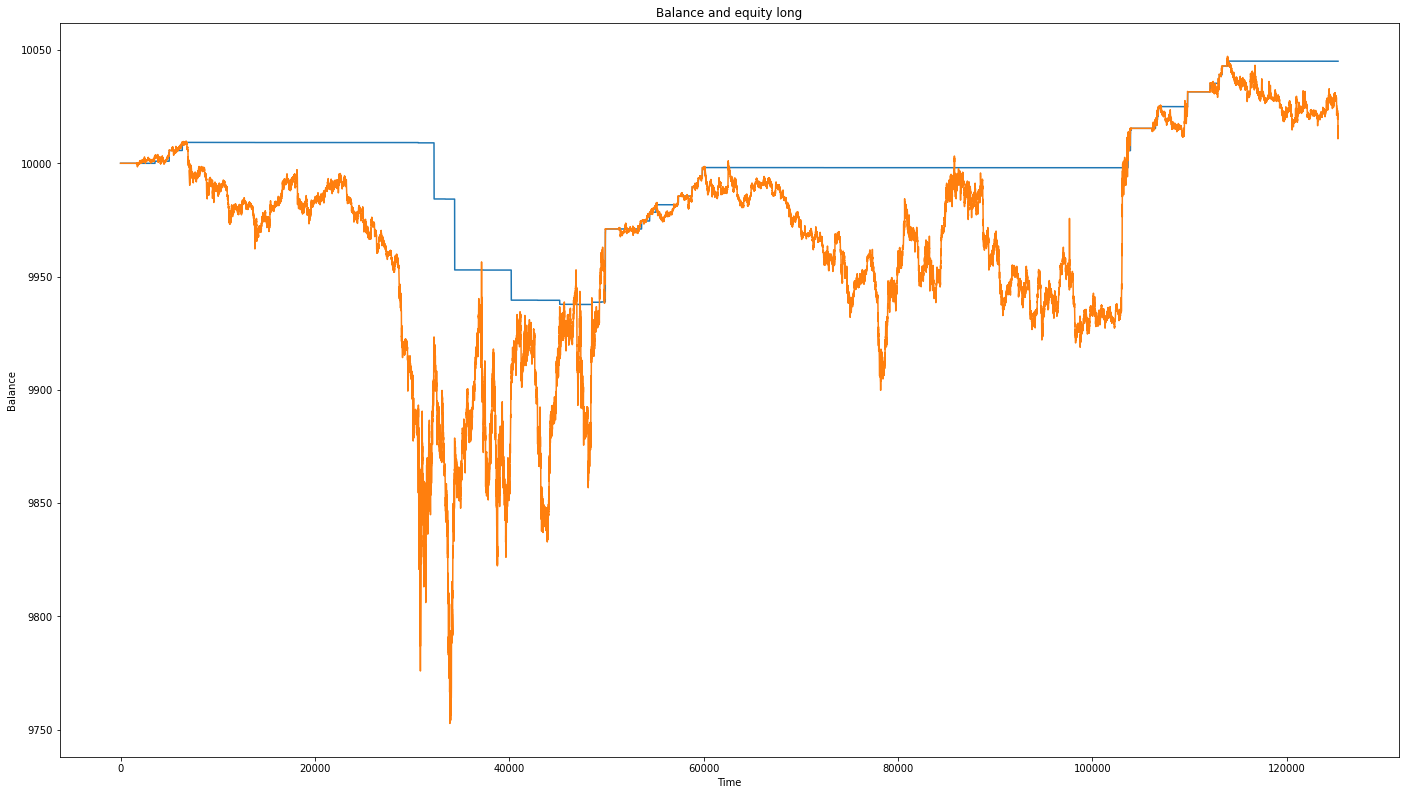

In [10]:
sdf.balance_long.plot()
sdf.equity_long.plot(title="Balance and equity long", xlabel="Time", ylabel="Balance")

<AxesSubplot:title={'center':'Balance and equity short'}, xlabel='Time', ylabel='Balance'>

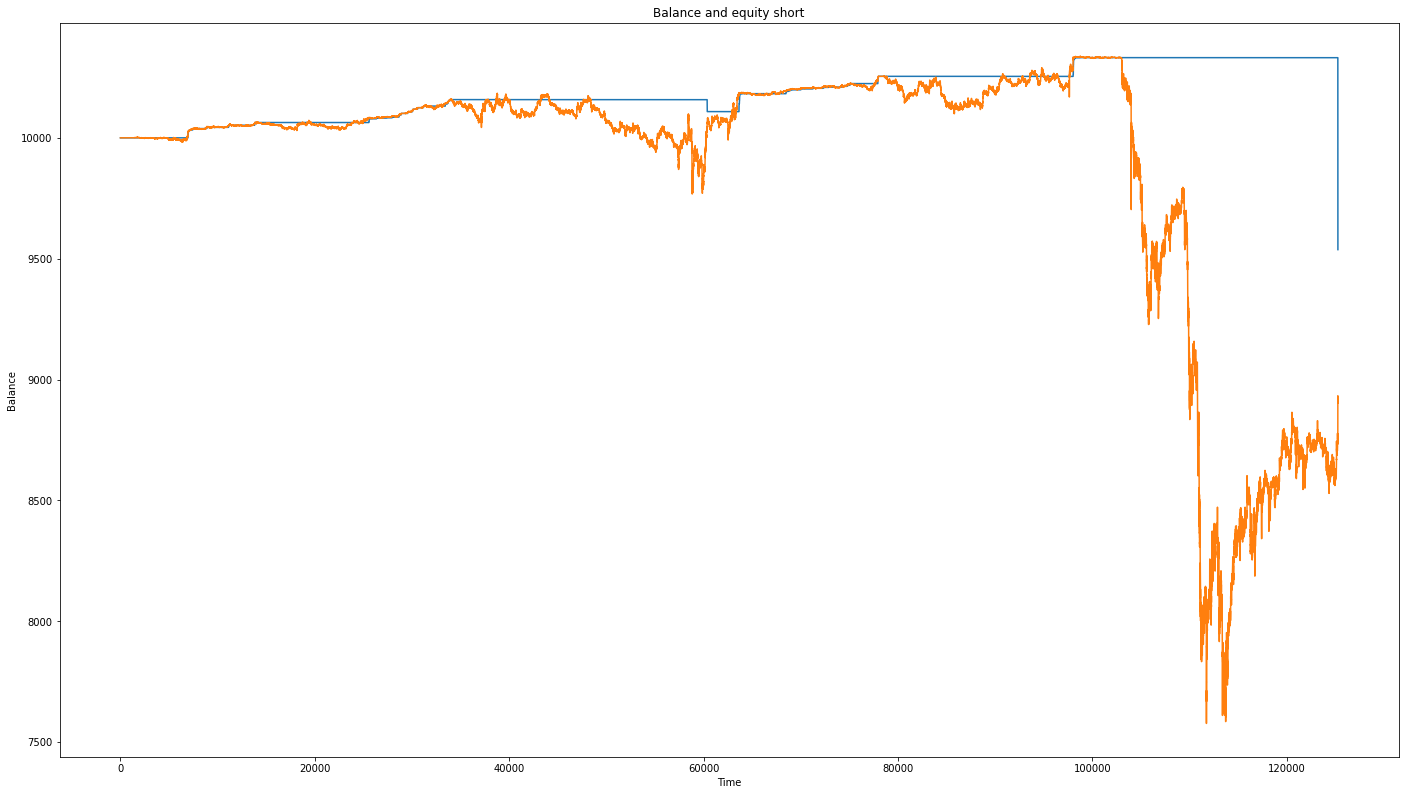

In [11]:
sdf.balance_short.plot()
sdf.equity_short.plot(title="Balance and equity short", xlabel="Time", ylabel="Balance")

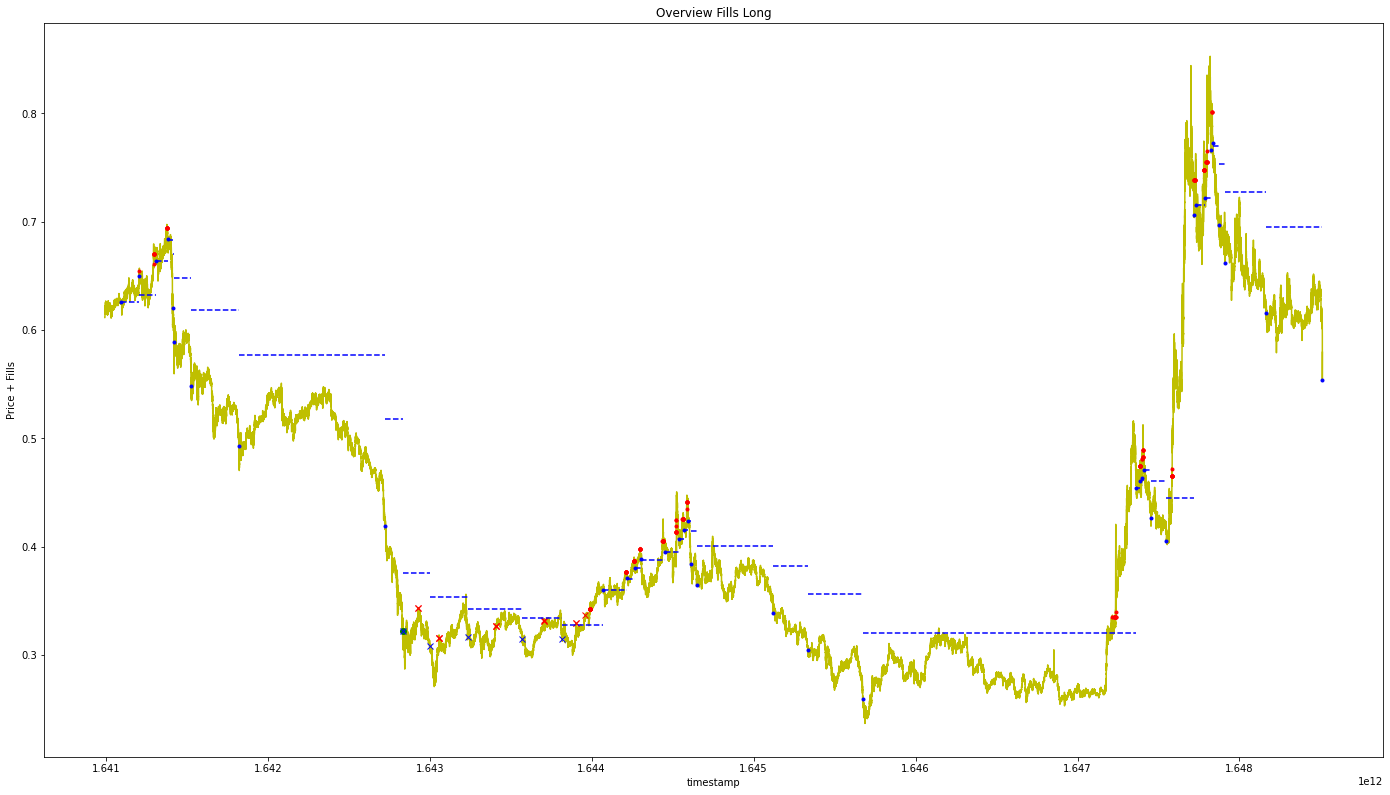

In [12]:
if len(longs) > 0:
    plot_fills(df, longs, plot_whole_df=True, title="Overview Fills Long")

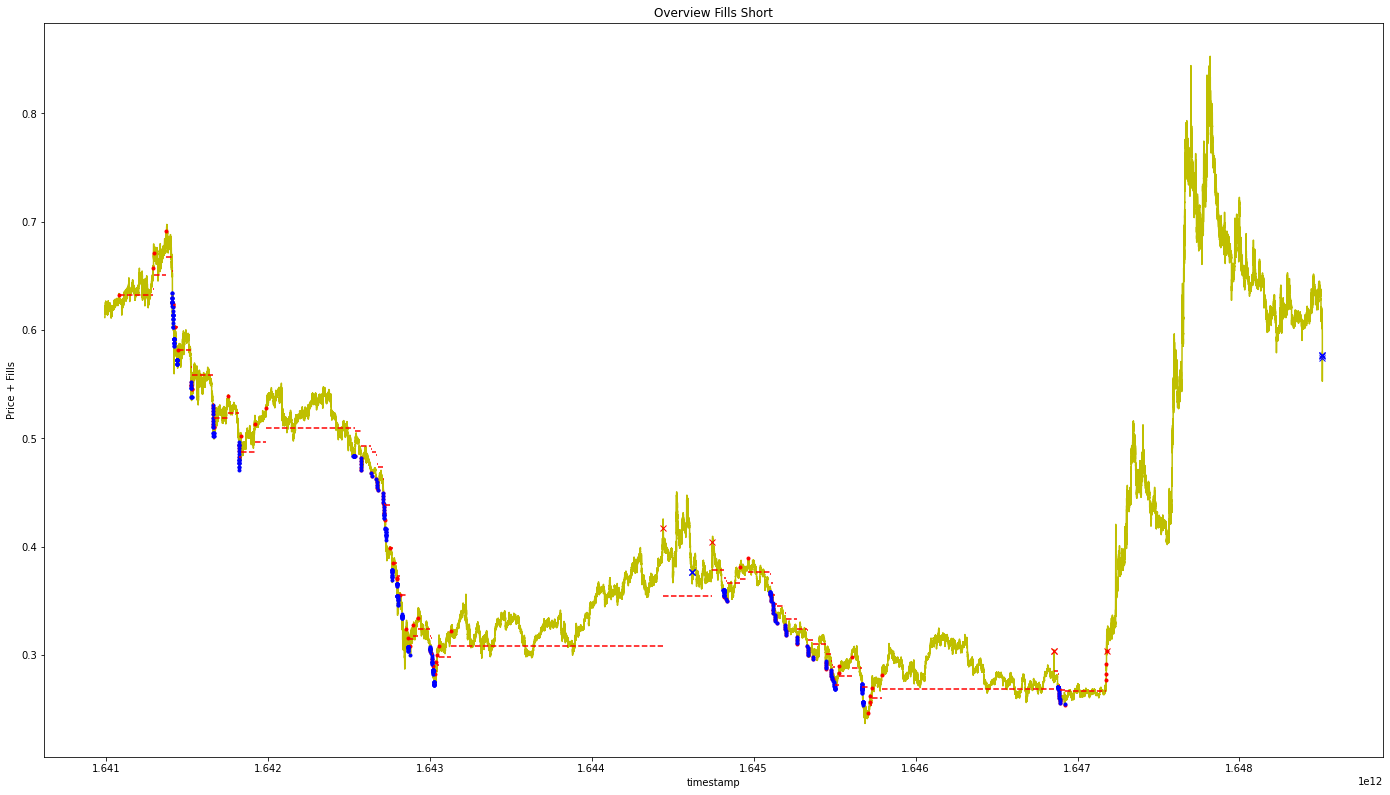

In [13]:
if len(shorts) > 0:
    plot_fills(df, shorts, plot_whole_df=True, title="Overview Fills Short")

<AxesSubplot:title={'center':'Position size in terms of contracts'}, xlabel='Time', ylabel='Long Position size'>

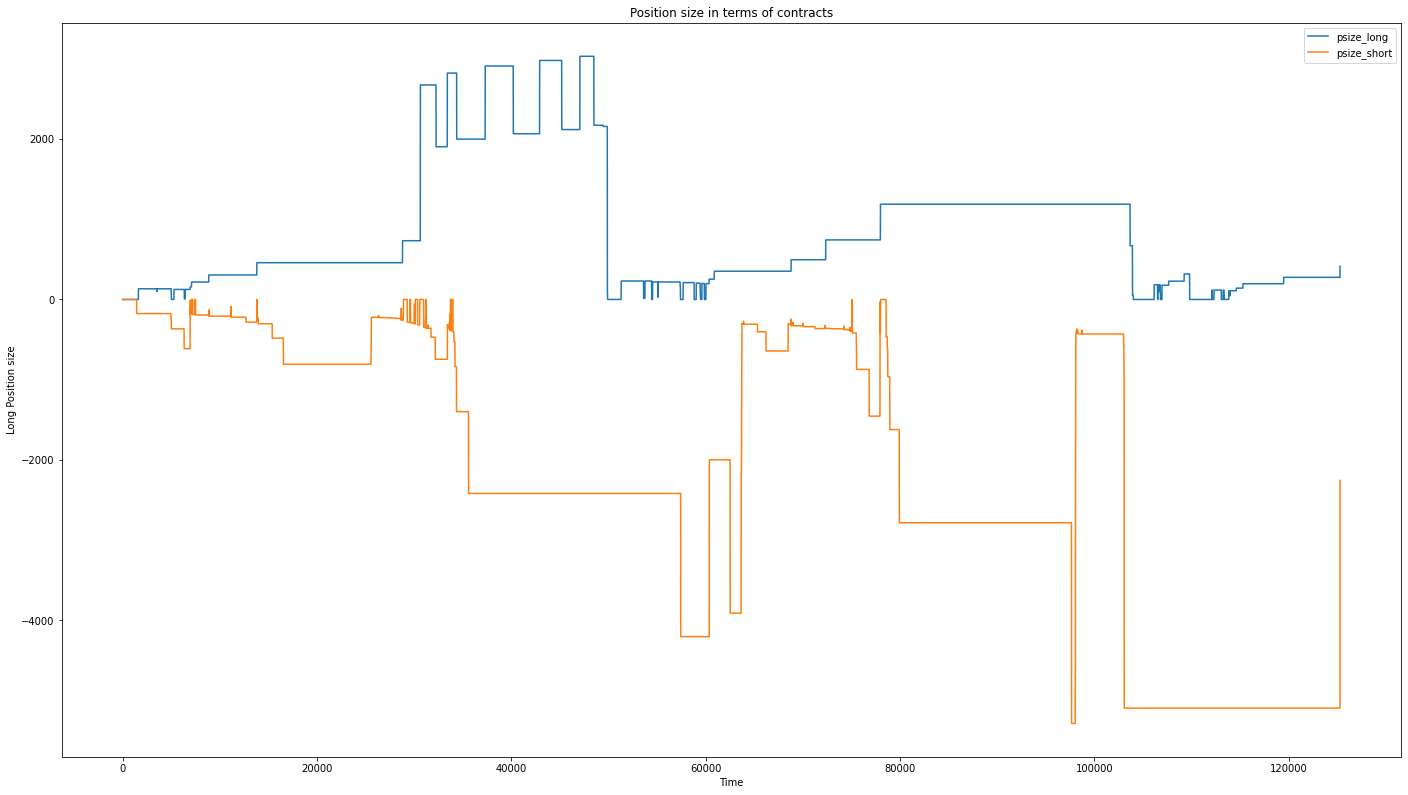

In [14]:
sdf[["psize_long", "psize_short"]].plot(
    title="Position size in terms of contracts", xlabel="Time", ylabel="Long Position size"
)

<AxesSubplot:title={'center':'Average entry price'}, xlabel='Time', ylabel='Price'>

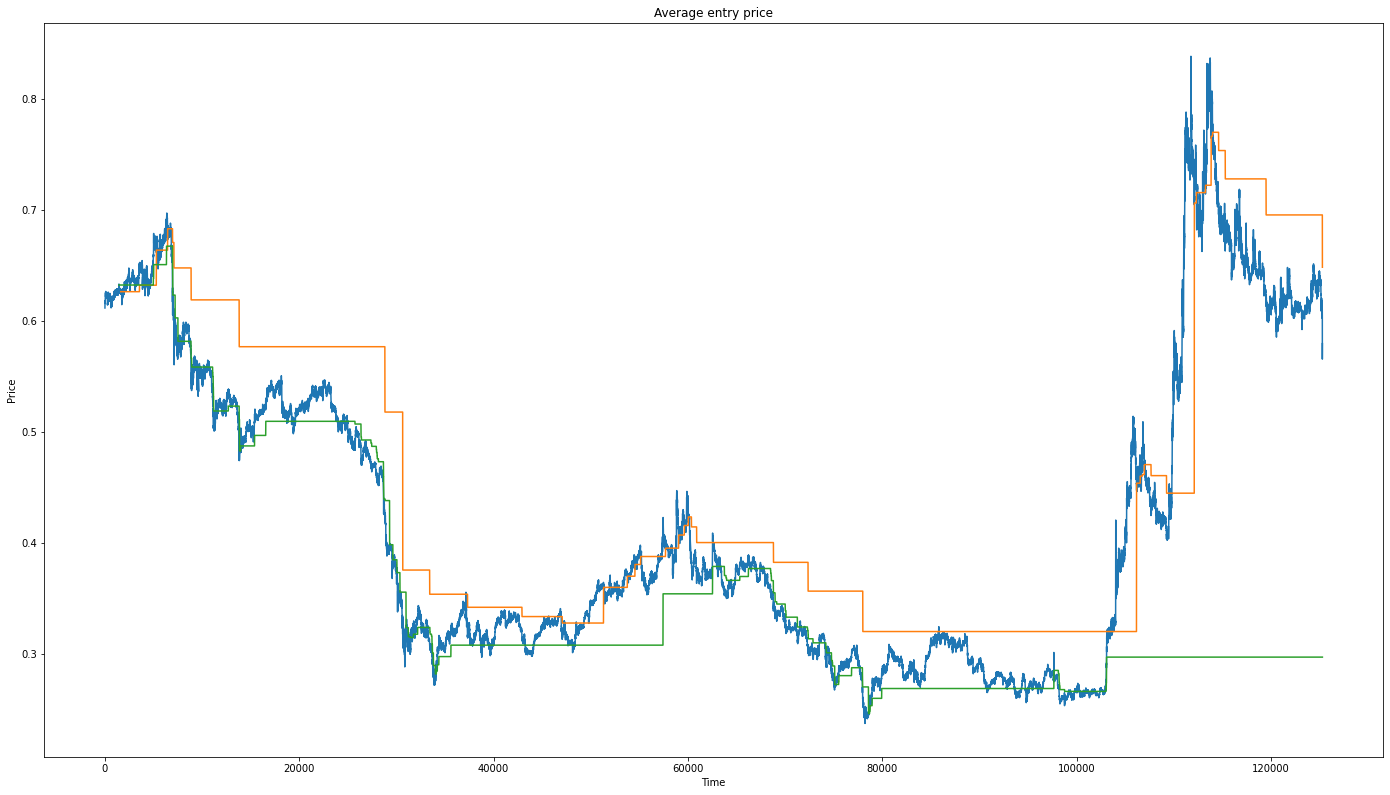

In [15]:
sdf.price.plot(title="Average entry price", xlabel="Time", ylabel="Price")
sdf.pprice_long.replace(0.0, np.nan).plot()
sdf.pprice_short.replace(0.0, np.nan).plot()

Mean price action distance long 0.116933


<AxesSubplot:title={'center':'Price action distance'}, xlabel='Time', ylabel='Price action distance'>

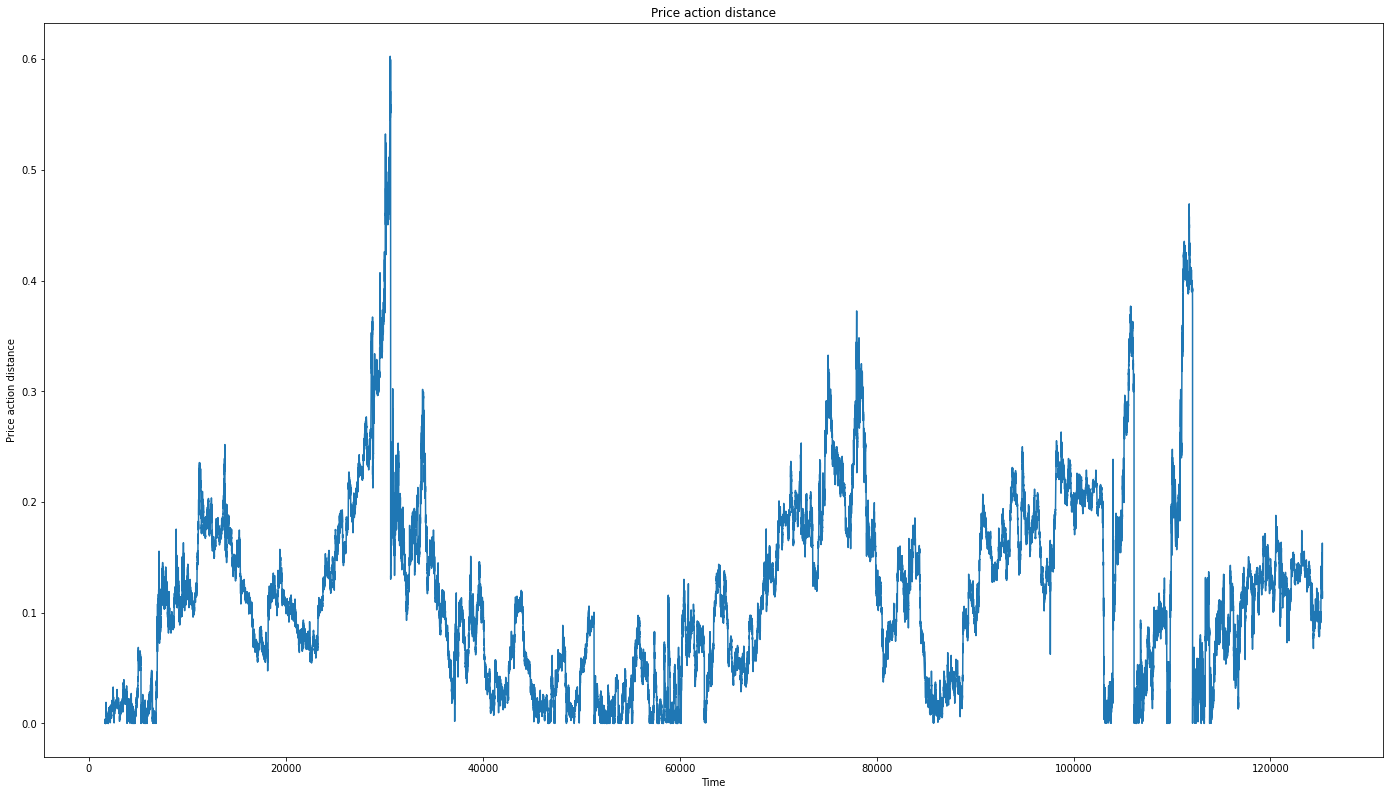

In [16]:
lpprices = sdf[sdf.pprice_long != 0.0]
pa_distance_long = (lpprices.pprice_long - lpprices.price).abs() / lpprices.price
print(f"Mean price action distance long {pa_distance_long.mean():.6f}")
pa_distance_long.plot(title="Price action distance", xlabel="Time", ylabel="Price action distance")

Mean price action distance short 0.123424


<AxesSubplot:title={'center':'Price action distance'}, xlabel='Time', ylabel='Price action distance'>

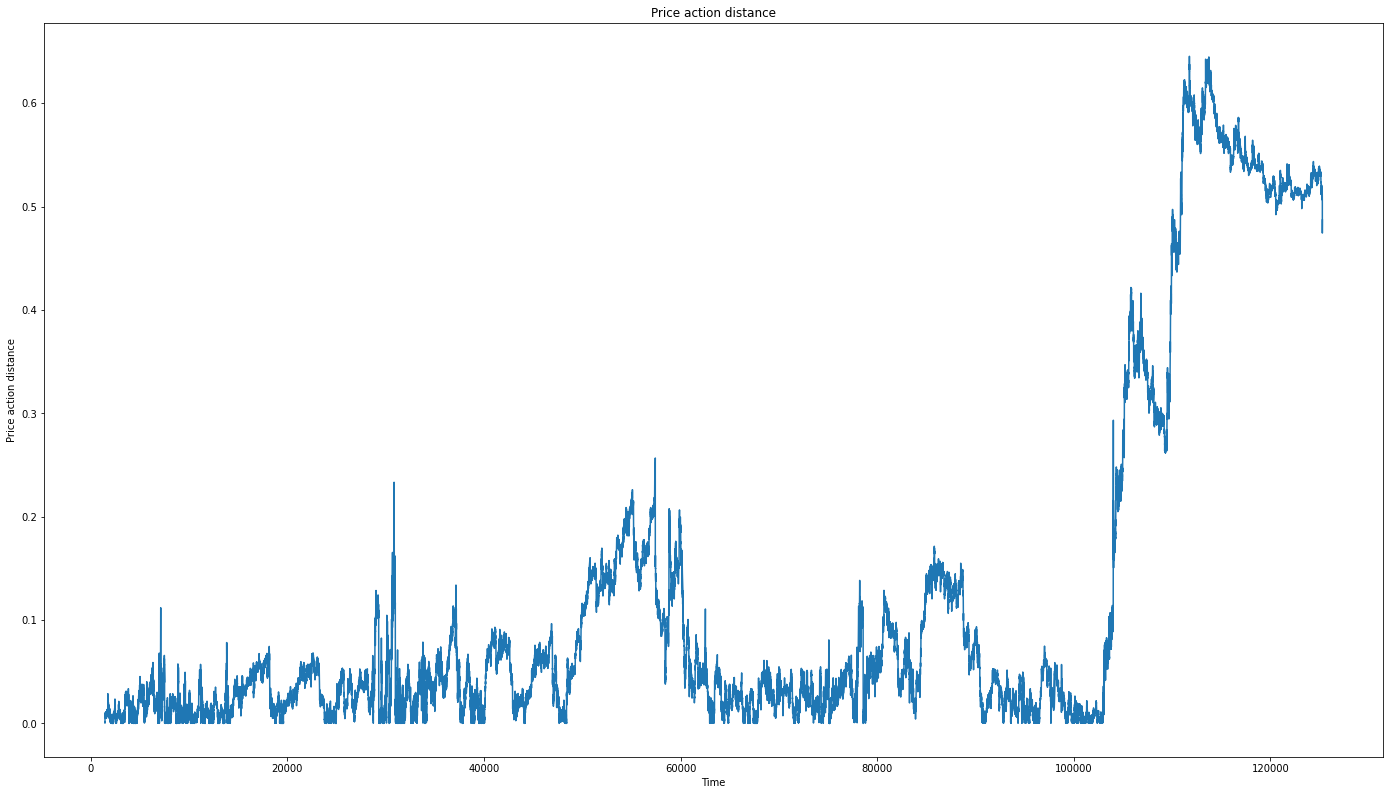

In [17]:
spprices = sdf[sdf.pprice_short != 0.0]
pa_distance_short = (spprices.pprice_short - spprices.price).abs() / spprices.price
print(f"Mean price action distance short {pa_distance_short.mean():.6f}")
pa_distance_short.plot(title="Price action distance", xlabel="Time", ylabel="Price action distance")

spans in minutes [1460.6024205026154, 1539.6676036640915, 1623.0127353595476] n_days 87.0


<AxesSubplot:title={'center':'Unstucking Bands and Initial Entry Band'}, xlabel='timestamp'>

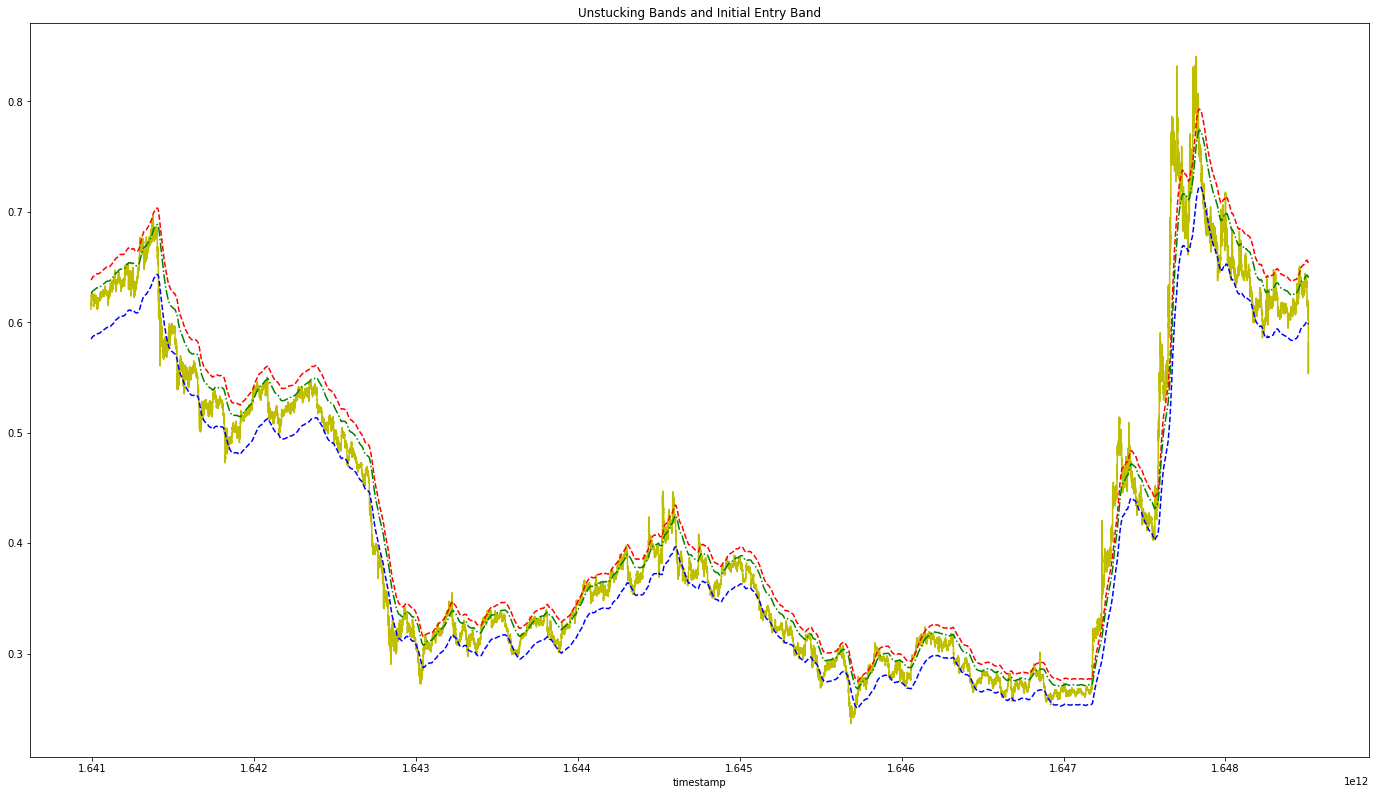

In [18]:
# Inspect long EMAs
# blue: lower unstucking; red: upper unstucking; green: initial entry
spans = [
    config_to_test["long"]["ema_span_0"],
    (config_to_test["long"]["ema_span_0"] * config_to_test["long"]["ema_span_1"]) ** 0.5,
    config_to_test["long"]["ema_span_1"],
]
print(
    f"spans in minutes {spans}",
    f"n_days {(df.index[-1] - df.index[0]) / 1000 / 60 / 60 / 24:.1f}",
)
spans_multiplier = 60 / ((timestamps[1] - timestamps[0]) / 1000)
for i in range(3):
    # change to seconds
    spans[i] = max(1.0, spans[i] * spans_multiplier)
emas = pd.DataFrame({str(span): df.price.ewm(span=span, adjust=False).mean() for span in spans})
ema_band_lower = emas.min(axis=1)
unstucking_band_lower = ema_band_lower * (1 - config_to_test["long"]["auto_unstuck_ema_dist"])
ema_band_upper = emas.max(axis=1)
unstucking_band_upper = ema_band_upper * (1 + config_to_test["long"]["auto_unstuck_ema_dist"])
long_ientry_band = ema_band_lower * (1 - config_to_test["long"]["initial_eprice_ema_dist"])
df.iloc[::100].price.plot(style="y-", title="Unstucking Bands and Initial Entry Band")
unstucking_band_lower.iloc[::100].plot(
    style="b--",
)
unstucking_band_upper.iloc[::100].plot(style="r--")
long_ientry_band.iloc[::100].plot(style="g-.")

spans in minutes [674.8712942654004, 985.8066056494938, 1440] n_days 87.0


<AxesSubplot:title={'center':'Unstucking Bands and Initial Entry Band'}, xlabel='timestamp'>

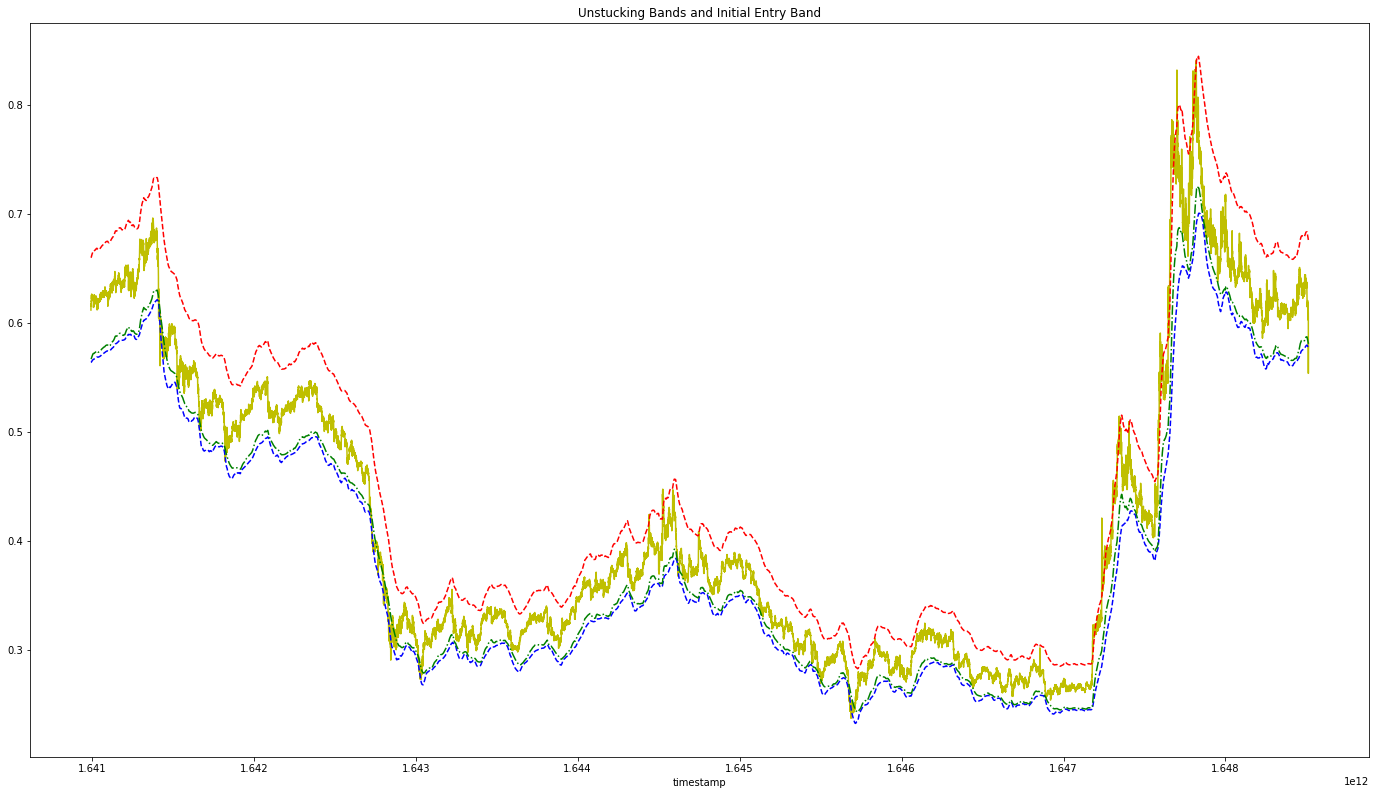

In [19]:
# Inspect short EMAs
# blue: lower unstucking; red: upper unstucking; green: initial entry
spans = [
    config_to_test["short"]["ema_span_0"],
    (config_to_test["short"]["ema_span_0"] * config_to_test["short"]["ema_span_1"]) ** 0.5,
    config_to_test["short"]["ema_span_1"],
]
print(
    f"spans in minutes {spans}",
    f"n_days {(df.index[-1] - df.index[0]) / 1000 / 60 / 60 / 24:.1f}",
)
spans_multiplier = 60 / ((timestamps[1] - timestamps[0]) / 1000)
for i in range(3):
    # change to seconds
    spans[i] = max(1.0, spans[i] * spans_multiplier)
emas = pd.DataFrame({str(span): df.price.ewm(span=span, adjust=False).mean() for span in spans})
ema_band_lower = emas.min(axis=1)
unstucking_band_lower = ema_band_lower * (1 - config_to_test["short"]["auto_unstuck_ema_dist"])
ema_band_upper = emas.max(axis=1)
unstucking_band_upper = ema_band_upper * (1 + config_to_test["short"]["auto_unstuck_ema_dist"])
short_ientry_band = ema_band_upper * (1 + config_to_test["short"]["initial_eprice_ema_dist"])
df.iloc[::100].price.plot(style="y-", title="Unstucking Bands and Initial Entry Band")
unstucking_band_lower.iloc[::100].plot(style="b--")
unstucking_band_upper.iloc[::100].plot(style="r--")
short_ientry_band.iloc[::100].plot(style="g-.")

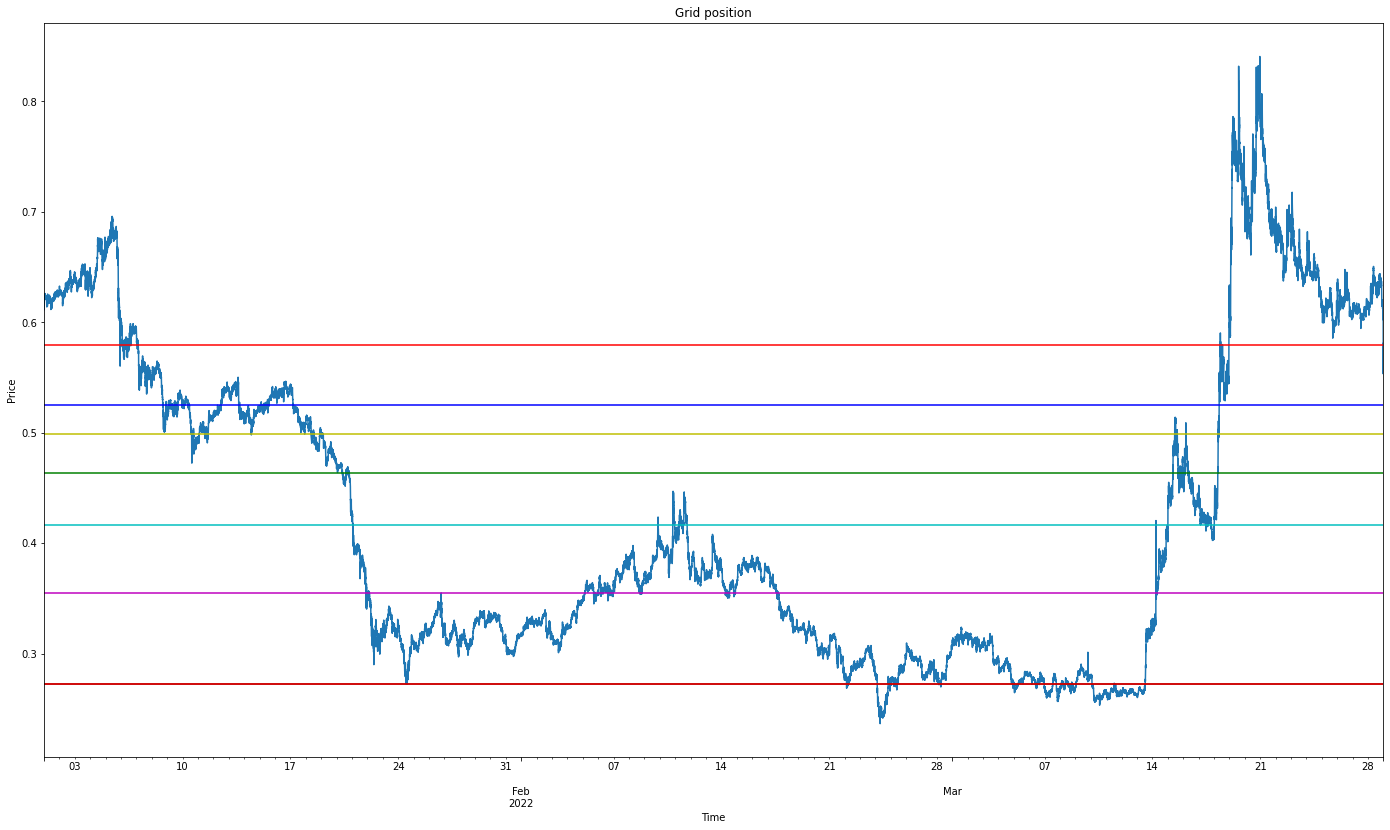

In [20]:
balance = config_to_test["starting_balance"]
highest_bid = df.price.iloc[-1]

inverse = config_to_test["inverse"]
do_long = True
qty_step = config_to_test["qty_step"]
price_step = config_to_test["price_step"]
min_qty = config_to_test["min_qty"]
min_cost = config_to_test["min_cost"]
c_mult = config_to_test["c_mult"]

grid_span = config_to_test["long"]["grid_span"]
wallet_exposure_limit = config_to_test["long"]["wallet_exposure_limit"]
max_n_entry_orders = config_to_test["long"]["max_n_entry_orders"]
initial_qty_pct = config_to_test["long"]["initial_qty_pct"]
eprice_pprice_diff = config_to_test["long"]["eprice_pprice_diff"]
eprice_exp_base = config_to_test["long"]["eprice_exp_base"]
secondary_allocation = config_to_test["long"]["secondary_allocation"]
secondary_pprice_diff = config_to_test["long"]["secondary_pprice_diff"]

grid = calc_whole_entry_grid_long(
    balance,
    highest_bid,
    inverse,
    qty_step,
    price_step,
    min_qty,
    min_cost,
    c_mult,
    grid_span,
    wallet_exposure_limit,
    max_n_entry_orders,
    initial_qty_pct,
    eprice_pprice_diff,
    secondary_allocation,
    secondary_pprice_diff,
    eprice_exp_base=eprice_exp_base,
)
gdf = pd.DataFrame(grid, columns=["qty", "price", "psize", "pprice", "wallet_exposure"])

gdf.loc[:, "eprice_pprice_diff"] = abs(gdf.price - gdf.pprice) / gdf.price
gdf.loc[:, "ddown_factor"] = gdf.qty / gdf.psize.shift()
gdf.loc[:, "bkr_price"] = gdf.apply(
    lambda x: calc_bankruptcy_price(balance, x.psize, x.pprice, 0.0, 0.0, inverse, c_mult),
    axis=1,
)
colors = "rbygcmk"

# Display grid on graph
# -- = pprice = new position price
# - = price = DCA entry
timedt = pd.to_datetime(timestamps, unit="ms")
dfx = pd.DataFrame({"timestamp": timedt, "price": prices}).set_index("timestamp")
lastdayfrom = pd.to_datetime(Args().end_date)
# lastdayfrom = pd.Timestamp('2021-05-21')
plt = (
    dfx.price.loc[lastdayfrom - pd.Timedelta(days=280) : lastdayfrom]
    .iloc[::100]
    .plot(title="Grid position", xlabel="Time", ylabel="Price")
)
for i, e in enumerate(gdf.itertuples()):
    plt.axhline(y=e.price, color=f"{colors[i%len(colors)]}", linestyle="-")
    # plt.axhline(y=e.pprice, color=f"{colors[i%len(colors)]}", linestyle="--")

In [21]:
a = (1 - gdf.iloc[[0, -1]]["price"].iat[-1] / gdf.iloc[[0, -1]]["price"].iat[0]) * 100
print("\nLong Grid Span = {:.2f} %\n".format(round(a, 2)))
gdf


Long Grid Span = 52.89 %



,qty,price,psize,pprice,wallet_exposure,eprice_pprice_diff,ddown_factor,bkr_price
0,144.0,0.5795,144.0,0.5795000000,0.00834480,0.0000000000,NaN,0.0
1,43.0,0.5250,187.0,0.5669679144,0.01060230,0.0799388846,0.2986111111,0.0
2,72.0,0.4986,259.0,0.5479621622,0.01419222,0.0990015286,0.3850267380,0.0
3,107.0,0.4636,366.0,0.5232989071,0.01915274,0.1287724485,0.4131274131,0.0
4,181.0,0.4171,547.0,0.4881581353,0.02670225,0.1703623478,0.4945355191,0.0
5,330.0,0.3552,877.0,0.4381282782,0.03842385,0.2334692517,0.6032906764,0.0
6,722.0,0.2730,1599.0,0.3635675422,0.05813445,0.3317492389,0.8232611174,0.0
7,1534.0,0.2730,3133.0,0.3192232684,0.10001265,0.1693160016,0.9593495935,0.0


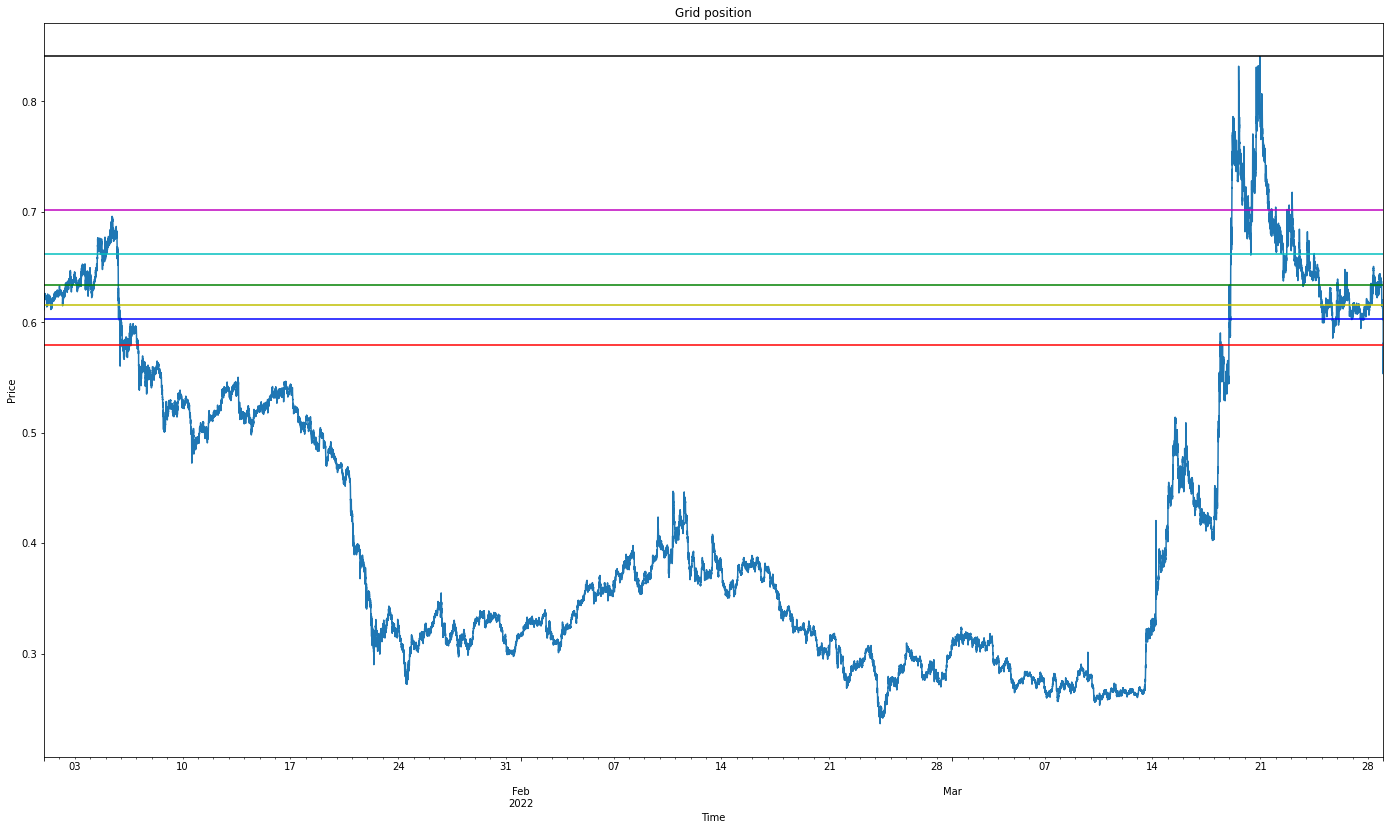

In [22]:
balance = config_to_test["starting_balance"]
lowest_ask = df.price.iloc[-1]

inverse = config_to_test["inverse"]
do_short = True
qty_step = config_to_test["qty_step"]
price_step = config_to_test["price_step"]
min_qty = config_to_test["min_qty"]
min_cost = config_to_test["min_cost"]
c_mult = config_to_test["c_mult"]

grid_span = config_to_test["short"]["grid_span"]
wallet_exposure_limit = config_to_test["short"]["wallet_exposure_limit"]
max_n_entry_orders = config_to_test["short"]["max_n_entry_orders"]
initial_qty_pct = config_to_test["short"]["initial_qty_pct"]
eprice_pprice_diff = config_to_test["short"]["eprice_pprice_diff"]
eprice_exp_base = config_to_test["short"]["eprice_exp_base"]
secondary_allocation = config_to_test["short"]["secondary_allocation"]
secondary_pprice_diff = config_to_test["short"]["secondary_pprice_diff"]

grid = calc_whole_entry_grid_short(
    balance,
    highest_bid,
    inverse,
    qty_step,
    price_step,
    min_qty,
    min_cost,
    c_mult,
    grid_span,
    wallet_exposure_limit,
    max_n_entry_orders,
    initial_qty_pct,
    eprice_pprice_diff,
    secondary_allocation,
    secondary_pprice_diff,
    eprice_exp_base=eprice_exp_base,
)
gdf = pd.DataFrame(grid, columns=["qty", "price", "psize", "pprice", "wallet_exposure"])

gdf.loc[:, "eprice_pprice_diff"] = abs(gdf.price - gdf.pprice) / gdf.price
gdf.loc[:, "ddown_factor"] = gdf.qty / gdf.psize.shift()
gdf.loc[:, "bkr_price"] = gdf.apply(
    lambda x: calc_bankruptcy_price(balance, x.psize, x.pprice, 0.0, 0.0, inverse, c_mult),
    axis=1,
)
colors = "rbygcmk"

# Display grid on graph
# -- = pprice = new position price
# - = price = DCA entry
timedt = pd.to_datetime(timestamps, unit="ms")
dfx = pd.DataFrame({"timestamp": timedt, "price": prices}).set_index("timestamp")
lastdayfrom = pd.to_datetime(Args().end_date)
# lastdayfrom = pd.Timestamp('2021-05-21')
plt = (
    dfx.price.loc[lastdayfrom - pd.Timedelta(days=280) : lastdayfrom]
    .iloc[::100]
    .plot(title="Grid position", xlabel="Time", ylabel="Price")
)
for i, e in enumerate(gdf.itertuples()):
    plt.axhline(y=e.price, color=f"{colors[i%len(colors)]}", linestyle="-")
    # plt.axhline(y=e.pprice, color=f"{colors[i%len(colors)]}", linestyle="--")

In [23]:
a = (1 - gdf.iloc[[0, -1]]["price"].iat[-1] / gdf.iloc[[0, -1]]["price"].iat[0]) * 100
print("\nShort Grid Span = {:.2f} %\n".format(round(a, 2)))
gdf


Short Grid Span = -45.13 %



,qty,price,psize,pprice,wallet_exposure,eprice_pprice_diff,ddown_factor,bkr_price
0,-192.0,0.5795,-192.0,0.5795000000,0.01112640,0.0000000000,NaN,52.6628333333
1,-59.0,0.6028,-251.0,0.5849768924,0.01468292,0.0295671990,0.3072916667,40.4256143426
2,-148.0,0.6155,-399.0,0.5962987469,0.02379232,0.0311961871,0.5896414343,25.6589553885
3,-269.0,0.6341,-668.0,0.6115211078,0.04084961,0.0356077783,0.6741854637,15.5815809880
4,-486.0,0.6615,-1154.0,0.6325694107,0.07299851,0.0437348288,0.7275449102,9.2980806759
5,-766.0,0.7016,-1920.0,0.6601097396,0.12674107,0.0591366312,0.6637781629,5.8684430729
6,-235.0,0.8410,-2155.0,0.6798355916,0.14650457,0.1916342549,0.1223958333,5.3202068213
